In [1]:
#: the usual imports
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

# Lecture 16

### The Normal Curve

In [2]:
#: data set of height/weight of 5000 adult males
height_and_weight = Table.read_table('height_and_weight.csv')
height_and_weight

Height,Weight
73.847,241.894
68.7819,162.31
74.1101,212.741
71.731,220.042
69.8818,206.35
67.253,152.212
68.7851,183.928
68.3485,167.971
67.0189,175.929
63.4565,156.4


## Distribution of heights

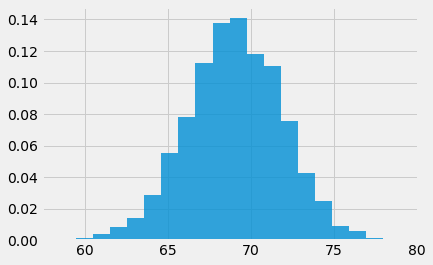

In [3]:
#: height histogram
defaults = dict(bins=20, linewidth=0, density=True, alpha=.8)
plt.hist(height_and_weight.column('Height'), **defaults);

## Distribution of weights

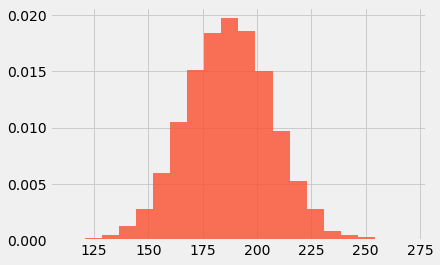

In [4]:
#: weight histogram
plt.hist(height_and_weight.column('Weight'), color='C1', **defaults);

## A familiar shape

- We've seen this bell-like shape frequently.
- These bells are different in two key aspects: center and spread.

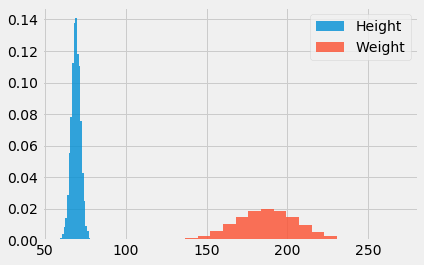

In [5]:
#: draw histograms on same scale
defaults = dict(bins=20, linewidth=0, density=True, alpha=.8)
plt.hist(height_and_weight.column('Height'), label='Height', **defaults);
plt.hist(height_and_weight.column('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

## Centering

- Subtracting the mean centers distribution

In [6]:
#: compute mean height
mean_height = height_and_weight.column('Height').mean()
mean_height

69.02634590621741

In [7]:
#: compute mean weight
mean_weight = height_and_weight.column('Weight').mean()
mean_weight

187.0206206581932

In [8]:
#: insert them into table
centered_height_and_weight = height_and_weight.with_columns(
    'Height', height_and_weight.column('Height') - mean_height,
    'Weight', height_and_weight.column('Weight') - mean_weight,
)

## Centering

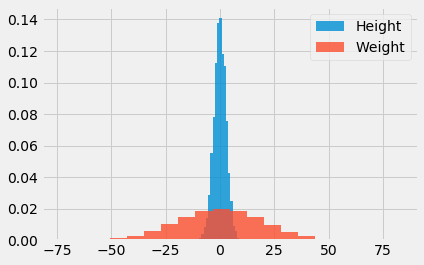

In [9]:
#: plot centered distributions
plt.hist(centered_height_and_weight.column('Height'), label='Height', **defaults);
plt.hist(centered_height_and_weight.column('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

## Scaling

- Want distributions to have the same width.
- So we divide by standard deviation.
- Data that is centered and scaled is *standardized*.

In [10]:
std_height = height_and_weight.column('Height').std()
std_height

2.863075878119538

In [11]:
std_weight = height_and_weight.column('Weight').std()
std_weight

19.779176302396458

In [12]:
standardized = centered_height_and_weight.with_columns(
    'Height', centered_height_and_weight.column('Height') / std_height,
    'Weight', centered_height_and_weight.column('Weight') / std_weight
)

## Standardized Histograms

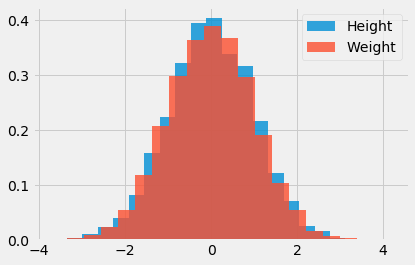

In [13]:
plt.hist(standardized.column('Height'), label='Height', **defaults);
plt.hist(standardized.column('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

## The (standard) normal curve

- The bell curves we've seen look essentially the same once standardized.
- This shape is called the **standard normal curve**.

$$
\phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2}
$$


## The standard normal curve

In [14]:
# define normal_curve using numpy
def normal_curve(x):
    return 1 / np.sqrt(2*np.pi) * np.exp(-x**2/2)

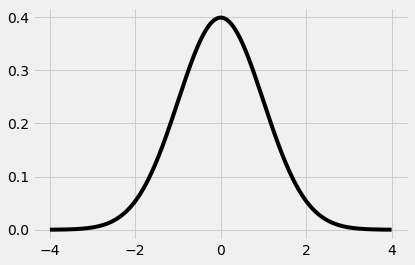

In [15]:
#: plot the curve
x = np.linspace(-4, 4, 1000)
y = normal_curve(x)

plt.plot(x, y, color='black')

## Heights/weights are approximately normal

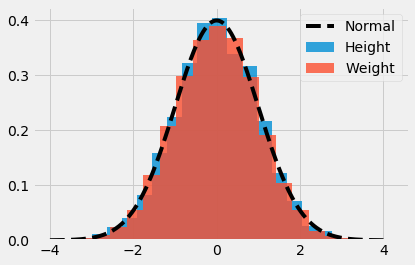

In [16]:
#: plot against normal curve
plt.hist(standardized.column('Height'), label='Height', **defaults);
plt.hist(standardized.column('Weight'), label='Weight', **defaults);
plt.plot(x, y, color='black', linestyle='--', label='Normal')
plt.legend(loc='upper right')

## The normal distribution

- We think of normal curve as a "continuous histogram"
    - a.k.a., probability density
- Mean and median are zero.
- Like a histogram:
    - total area is 1
    - area between $a$ and $b$ is probability of observing value between $a$ and $b$

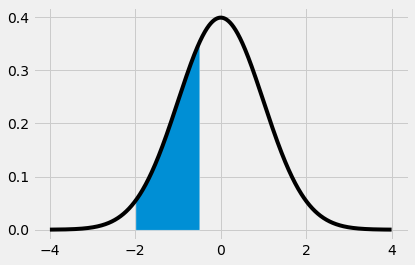

In [17]:
#: area under the curve
[a, b] = [-2, -.5]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix])

## The standard normal "CDF"

- Area under the curve == integration
- No closed-form antiderivative, but we can approximate
- `scipy.stats.norm.cdf(z)`: area under curve from $-\infty$ to $z$

## Discussion question

What will `scipy.stats.norm.cdf(0)` evaluate to?

- A) $\pi$
- B) $0$
- C) $1$
- D) $\frac{1}{2}$
- E) $42$

## Answer

In [18]:
#: calculate area between -infinity and 0
from scipy import stats
stats.norm.cdf(0)

0.5

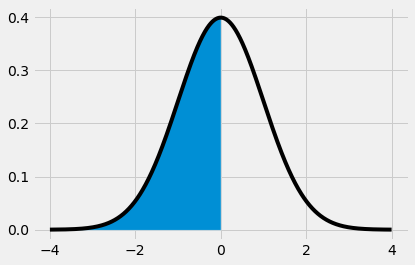

In [19]:
#: area under the curve
[a, b] = [-np.inf, 0]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix])

## Example: area between [-1, 0]

- Strategy: 
$$(\text{area from $-\infty$ to $0$}) - (\text{area from -$\infty$ to $-1$})$$

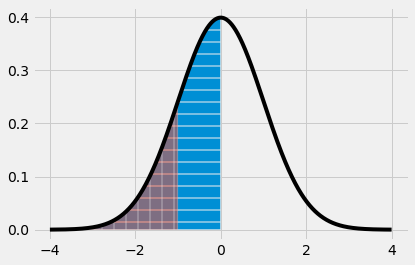

In [20]:
#: area under the curve
[a, b] = [-1, 0]
ix = (x <= b)
ix_out = (x <= a)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix], hatch='-')
plt.fill_between(x[ix_out], y[ix_out], hatch='|', alpha=.5)

## In general...

- Area within $[a,b]$ is ``stats.norm.cdf(b) - stats.norm.cdf(a)``

## Special cases

- Area within $\pm z$ standard deviations of mean:

$z$ | area
----|-----
1| $\approx$ 68%
2| $\approx$ 95%
3 | $\approx$ 99.73%

## Standard units

- What proportion of weights are between 200 and 225?
- We could just count.
- But let's use fact that data is $\approx$ normal.

## Histogram area within [200, 225]...

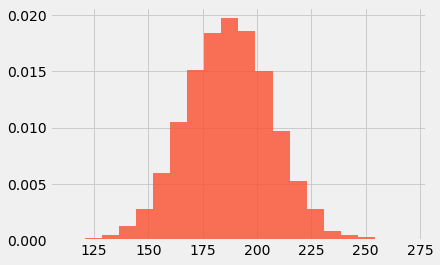

In [21]:
#: weight histogram
plt.hist(height_and_weight.column('Weight'), color='C1', **defaults);

## Normal curve area within [?, ?]...

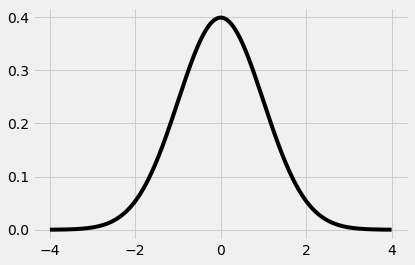

In [22]:
#: normal curve
plt.plot(x, y, color='black')

## Standard units

- What does 225 become after standardization?

$$225 \mapsto  \frac{225 - \text{mean}}{\text{std}}$$

In [23]:
#::
(225 - mean_weight) / std_weight

1.9201699181580782

- Interpretation: 225 is 1.92 stds above the mean
- 225 becomes 1.92 in **standard units**.

## Standard units and area

- Define $z(x) = (x - \text{mean})/\text{std}$.
- $z(x)$ maps $x$ to standard units.
- Suppose a distribution is (roughly) normal. These are approx. equal:
    - Area between $a$ and $b$ in histogram.
    - Area between $z(a)$ and $z(b)$ in standard normal curve.

## Standard units and area

In [24]:
#::
left = (200 - mean_weight) / std_weight
left

0.656214351061435

In [25]:
#::
right = (225 - mean_weight) / std_weight
right

1.9201699181580782

In [26]:
#:: area in standard normal curve
approximation = stats.norm.cdf(right) - stats.norm.cdf(left)
approximation

0.22842488819306406

Approx. 22.8% of weights are between 200 and 225 (inclusive).

## Checking the approximation

In [27]:
#:
height_and_weight.where(
    'Weight', 
    are.between_or_equal_to(200, 225)
).num_rows / height_and_weight.num_rows

0.2294

In [28]:
#: approximation from using CDF
approximation

0.22842488819306406

## To summarize:

- Suppose we know the following about a distribution:
    - it is approximately normal,
    - its mean and standard deviation,
- We can use CDF to compute percentiles without using the data itself.

## Chebychev and the normal curve

- Chebychev: At *least* $1-1/z^2$ percent of data are within $z$ stds of the mean.
- Works for any distribution.
- We can do better if we know the distribution is normal:


$z$ | Chebychev | Normal
----|-----|------
1| $\geq$ 0% | $\approx$ 68%
2| $\geq$ 75% | $\approx$ 95%
3 | $\geq$ 88% | $\approx$ 99.73%

# The Central Limit Theorem

## Question

Why do we see bell curves so often?

## Bell-shaped data

- Data distribution is often bell-shaped (some more than others)
- We've seen this to be true for height and weight.
- But many more examples...

## Example: Baseball runners left on base

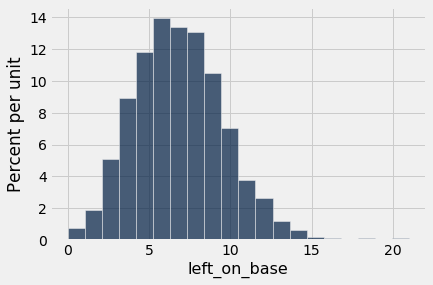

In [29]:
#:
Table.read_table('baseball.csv').hist('left_on_base', bins=20)

## Example: Natural sleep duration

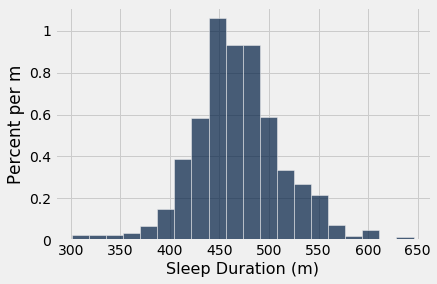

In [30]:
#:
Table.read_table('./sleep.csv').hist(bins=20, unit='m')

## But...

- ...most data isn't bell-shaped!
- Skewed to one side, multi-modal, etc.

## Example: San Diego city salaries

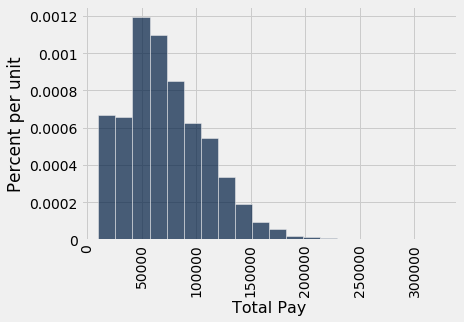

In [31]:
#:
Table.read_table('./salaries.csv').hist('Total Pay', bins=20)

## Example: Flight delays

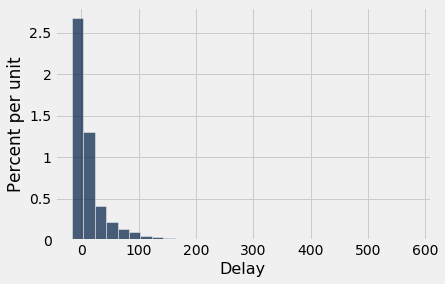

In [32]:
#:
flights = Table.read_table('./united_summer2015.csv')
flights.hist('Delay', bins=30)

## But...

- ...even when population distribution isn't bell-shaped, empirical distribution of statistics often are.
- Example: distribution of sample mean.

## Example: Flight delays

- We want to know the average flight delay.
- We take a random sample of flights, compute sample mean.
- The sample mean could have been different!

In [33]:
#: draw 1000 sample means
n_samples = 1000

sample_means = make_array()

for i in np.arange(n_samples):
    sample = flights.sample(2000, with_replacement=True)
    sample_mean = sample.column('Delay').mean()
    sample_means = np.append(sample_means, sample_mean)

## Example: flight delays

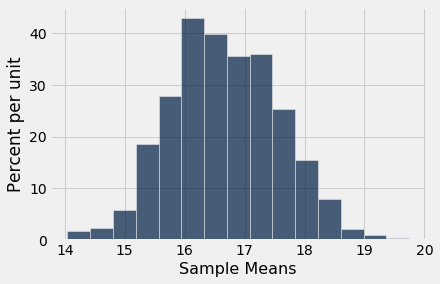

In [34]:
#: visualize
Table().with_column('Sample Means', sample_means).hist(bins=15)

## A ubiquitous phenomenon

- The population was not normal, but distribution of sample mean is.
- All of the bootstrap distributions we saw were bell-shaped.
- This appears to be a deep fact about randomness.

## The Central Limit Theorem

> The distribution of sums (and averages) of large random samples (w/ replacement) are roughly normal, regardless of the distribution of the population from which the sample was drawn

## Example: Scratch-off lottery tickets

- Table below shows the odds of each payout of a lottery ticket

In [35]:
lottery = Table(['Prize', 'Odds']).with_rows(
[
    [0, .4],
    [1, .3],
    [5, .2],
    [20, .05],
    [50, .05]
])
lottery

Prize,Odds
0,0.4
1,0.3
5,0.2
20,0.05
50,0.05


## Example: Lottery tickets

- Each ticket costs $5; subtract from payout
- Very non-normal distribution

In [36]:
#:
payout = lottery.with_column('Gain/Loss', lottery.column('Prize') - 5)
payout

Prize,Odds,Gain/Loss
0,0.4,-5
1,0.3,-4
5,0.2,0
20,0.05,15
50,0.05,45


## Simulating one lottery ticket

- Choose a payout according to odds.
- `np.random.choice` accepts an array of probabilities.

In [37]:
# randomly choose a payout according to odds
np.random.choice(payout.column('Gain/Loss'), p=payout.column('Odds'))

-5

## Simulating 100 tickets

- How much do you win/lose after buying 100 tickets?

In [38]:
#:
def buy_k_tickets(k):
    winnings = make_array()

    for i in np.arange(k):
        won = np.random.choice(payout.column('Gain/Loss'), p=payout.column('Odds'))
        winnings = np.append(winnings, won)
        
    return winnings

## Repeating the experiment

- After purchasing 100 tickets, your total winnings are a number.
- But it could have been different...
- Total winnings come from some distribution.
- We can approximate it through simulation.

## Repeating the experiment

In [40]:
#: simulate

distribution = make_array()
n_repetitions = 1000

for i in np.arange(n_repetitions):
    winnings = buy_k_tickets(100).sum()
    distribution = np.append(distribution, winnings)

## Visualizing

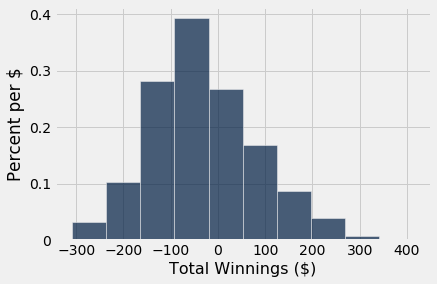

In [41]:
#: does it look normal?
Table().with_columns('Total Winnings', distribution).hist(unit='$')

## Discussion question

How will the distribution change if the experiment were repeated, but with 400 tickets instead of 100?

- A) It will get narrower.
- B) It will get wider.
- C) It will stay the same.
- D) It will turn red.

## Answer

In [42]:
#: simulateI

distribution_400 = make_array()
n_repetitions = 1000

for i in np.arange(n_repetitions):
    winnings = buy_k_tickets(400).sum()
    distribution_400 = np.append(distribution_400, winnings)

## Answer

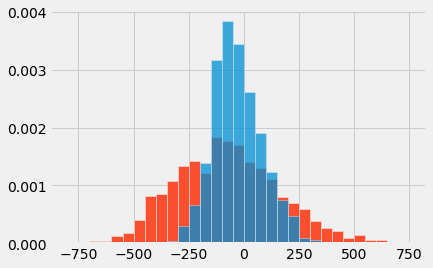

In [43]:
#: does it look normal?
bins = np.arange(-800, 800, 50)
plt.hist(distribution_400, color='C1', bins=bins, density=True, label='400');
plt.hist(distribution, bins=bins, density=True, alpha=.75, label='100');

## The shape of the distribution

- CLT: Sums and averages of random samples are roughly normal.
- Centered at population mean.
- What is the spread of the distribution?

In [44]:
#: draw `sample_size` flights, compute mean, `n_samples` times
def sample_mean_delays(sample_size, n_samples=2000):
    sample_means = make_array()
    for i in np.arange(n_samples):
        sample = flights.sample(sample_size)
        sample_mean = sample.column('Delay').mean()
        sample_means = np.append(sample_means, sample_mean)
    return sample_means

In [45]:
#: repeat the experiment for various sample sizes
sample_means = {}
sample_sizes = [100, 200, 400, 800, 1600]

for size in sample_sizes:
    sample_means[size] = sample_mean_delays(size)

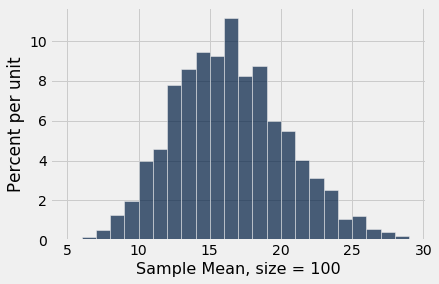

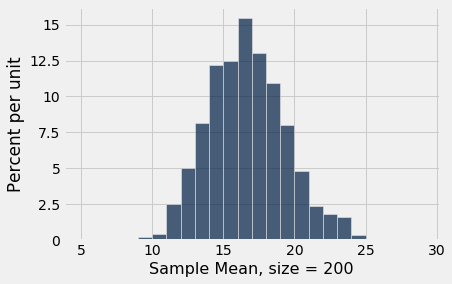

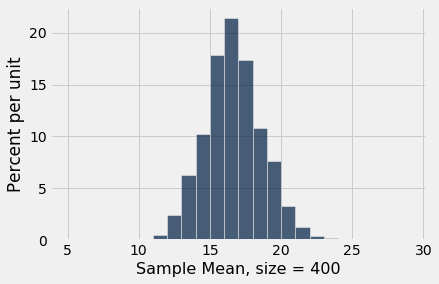

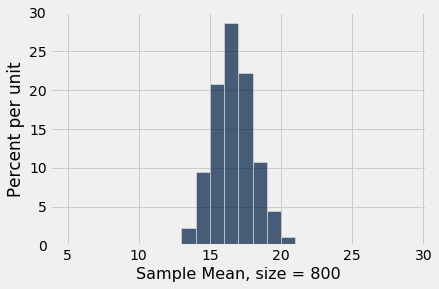

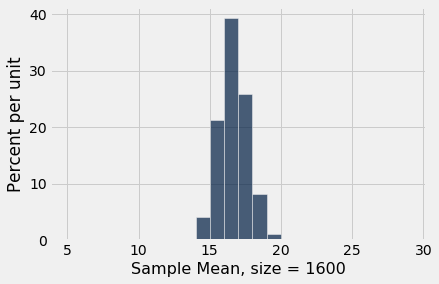

In [46]:
#: plot the distributions
bins = np.arange(5, 30)
for size in sample_sizes:
    Table().with_column(
        f'Sample Mean, size = {size}',
        sample_means[size]
    ).hist(bins=bins)

In [47]:
#: compute standard deviation of each distribution
sds = []
for size in sample_sizes:
    sd = np.std(sample_means[size])
    sds.append(sd)

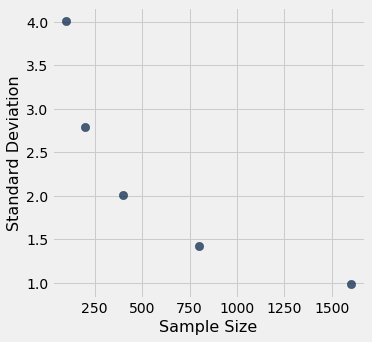

In [48]:
#: plot trend
observed = Table().with_columns(
    'Sample Size', sample_sizes,
    'Standard Deviation', sds
)

observed.scatter('Sample Size', s=70)

## CLT for the sample mean

- Sample mean of random samples is distributed normally.
- Centered at population mean.
- Standard deviation is:
$$
    \frac{
        \text{population standard dev.}
    }{
        \sqrt{\text{sample size}}
    }
$$

In [49]:
#: clt's prediction
def clt_standard_deviation(n):
    sigma = flights.column('Delay').std()
    return sigma / np.sqrt(n)

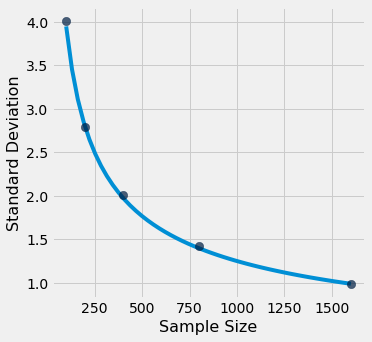

In [50]:
#: plot prediction and observed
observed.scatter('Sample Size', s=70, zorder=2)
x = np.linspace(100, 1600)
y = clt_standard_deviation(x)
plt.plot(x, y, zorder=1)

## Recap

- We want to find population mean.
- But we only have one sample.
- Hope that sample mean is close to population mean.
- But it could have been different.

## Recap

- We can run bootstrap, or (sometimes) draw more samples to approximate sampling distribution.
- But CLT says that it is normal.
- Centered at population mean.
- Standard deviation is:
$$
    \frac{
        \text{population standard dev.}
    }{
        \sqrt{\text{sample size}}
    }
$$